<a href="https://colab.research.google.com/github/M254-bto/learning-deep-learning/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
wimport os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import random
import glob
import shutil

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Deep learning/Data/cats vs dogs')

In [ ]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/Deep learning/Data/cats vs dogs'

In [ ]:
train_path = os.path.join(BASE_DIR, 'train')
valid_path = os.path.join(BASE_DIR, 'valid')
test_path = os.path.join(BASE_DIR, 'test')


In [ ]:
path = [train_path, valid_path]
var = ['train_batches', 'valid_batches']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory = train_path,
    target_size=(244, 244),
    classes=['cats', 'dogs'],
    batch_size=10
    )
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory = valid_path,
    target_size=(244, 244),
    classes=['cats', 'dogs'],
    batch_size=10
    )
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
      directory = test_path,
      target_size=(244, 244),
      classes=['cats', 'dogs'],
      batch_size=10, shuffle=False
  )

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
images, labels = next(train_batches)

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

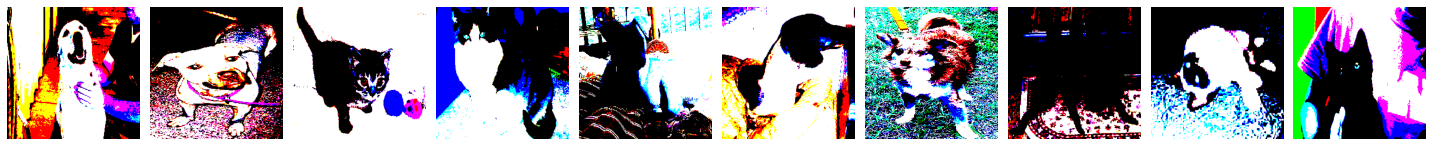

In [ ]:
plotImages(images)
print(labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten

model = Sequential([
    Conv2D(filters=32,
          kernel_size=(3, 3),
          activation='relu',
          padding='same',
          input_shape=(244, 244, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           activation='relu',
           padding='same'),
    MaxPool2D(pool_size=(2, 2),strides=2),
   Flatten(),
   Dense(units=2, activation='softmax')
])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_batches, validation_data=valid_batches, epochs=15, verbose=2)

Epoch 1/15
10/10 - 113s - loss: 77.5987 - accuracy: 0.5500 - val_loss: 18.5316 - val_accuracy: 0.5200 - 113s/epoch - 11s/step
Epoch 2/15
10/10 - 11s - loss: 21.3795 - accuracy: 0.6000 - val_loss: 25.8375 - val_accuracy: 0.4900 - 11s/epoch - 1s/step
Epoch 3/15
10/10 - 11s - loss: 11.1846 - accuracy: 0.7500 - val_loss: 20.0832 - val_accuracy: 0.5400 - 11s/epoch - 1s/step
Epoch 4/15
10/10 - 11s - loss: 5.6203 - accuracy: 0.7600 - val_loss: 9.8961 - val_accuracy: 0.6300 - 11s/epoch - 1s/step
Epoch 5/15
10/10 - 11s - loss: 1.5669 - accuracy: 0.8800 - val_loss: 9.3073 - val_accuracy: 0.5800 - 11s/epoch - 1s/step
Epoch 6/15
10/10 - 11s - loss: 0.5607 - accuracy: 0.9500 - val_loss: 13.7569 - val_accuracy: 0.6100 - 11s/epoch - 1s/step
Epoch 7/15
10/10 - 11s - loss: 0.1515 - accuracy: 0.9900 - val_loss: 14.5135 - val_accuracy: 0.5400 - 11s/epoch - 1s/step
Epoch 8/15
10/10 - 11s - loss: 0.5858 - accuracy: 0.9800 - val_loss: 13.0546 - val_accuracy: 0.5500 - 11s/epoch - 1s/step
Epoch 9/15
10/10 - 1

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred = model.predict(test_batches)

In [ ]:
for i in np.round(y_pred):
  print(i)

[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
conf_mat = confusion_matrix(test_batches.classes, np.argmax(y_pred, axis=1))

In [ ]:
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['cats', 'dogs'])

In [ ]:
cmd.plot()

In [ ]:
test_batches.class_indices